In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import pandas as pd
import numpy as np
import joblib


from utils.tabular_data import load_airbnb_data

We found out that best model was Gradient Boosting Classifier model. We will load the model from the saved model and look at the results.

In [4]:
gb_model = joblib.load("models/classification/GradientBoostingClassifier/GradientBoostingClassifier.joblib")

In [6]:
df = pd.read_csv("data/cleaned_data.csv")
df.drop(columns=["Unnamed: 19"], inplace=True)
X, y = load_airbnb_data(df, "Category")
X = X.select_dtypes(include=np.number)


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [8]:
gb_model.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.2, max_features='log2',
                           min_samples_leaf=0.1)

In [9]:
y_hat = gb_model.predict(X_train)
y_test_hat = gb_model.predict(X_test)

In [10]:
print(
        f"Accuracy of best classification model on test data : {accuracy_score(y_test, y_test_hat)}"
    )
print(
        f"Precision of best classification model on test data : {precision_score(y_test, y_test_hat, average='weighted')}"
    )
print(
        f"Recall of best classification model on test data : {recall_score(y_test, y_test_hat, average='weighted')}"
    )
print(
        f"F1 score of best classification model on test data : {f1_score(y_test, y_test_hat, average='weighted')}"
    )

Accuracy of best classification model on test data : 0.38235294117647056
Precision of best classification model on test data : 0.3814112766318649
Recall of best classification model on test data : 0.38235294117647056
F1 score of best classification model on test data : 0.38022412874614514


In [12]:
cm = confusion_matrix(y_test, y_test_hat, labels=gb_model.classes_)


In [14]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gb_model.classes_)


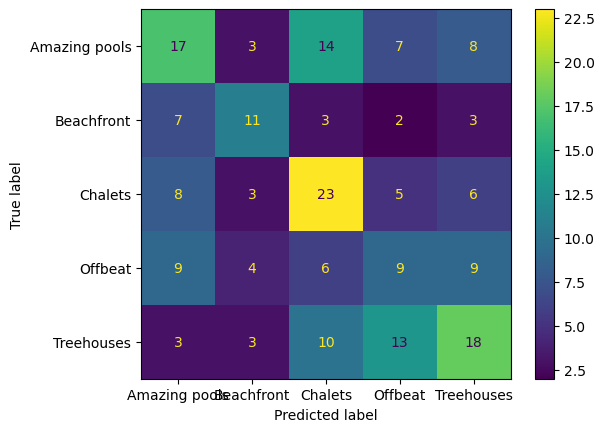

In [15]:
disp.plot()
